In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import math

In [2]:
# 그래프의 크기와 해상도 설정
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['figure.dpi'] = 100
fontList = fm.findSystemFonts(fontext = 'ttf')
fontPath = [font for font in fontList if 'NanumBarunGothic' in font]
fontProp = fm.FontProperties(fname = fontPath[4])
# 한글 폰트와 글자 크기 설정
plt.rcParams['font.family'] = fontProp.get_name()
plt.rcParams['font.size'] = 12

In [3]:
def compare_review(df, mode, title):
    
    # 반기별로 데이터 분리
    df2019_1  = df[(df['년']==2019) & (df['월'] < 7)]
    df2019_2  = df[(df['년']==2019) & (df['월'] > 6)]
    
    df2020_1  = df[(df['년']==2020) & (df['월'] < 7)]
    df2020_2  = df[(df['년']==2020) & (df['월'] > 6)]
    
    df2021_1  = df[(df['년']==2021) & (df['월'] < 7)]
    df2021_2  = df[(df['년']==2021) & (df['월'] > 6)]    
    
    
    # 월별 리뷰 및 총 반기별 리뷰 개수 카운트 
    review2019_1 = df2019_1['월'].value_counts()
    sum2019_1 = df2019_1['월'].value_counts().sum()
    
    review2019_2 = df2019_2['월'].value_counts()
    sum2019_2 = df2019_2['월'].value_counts().sum()
    
    review2020_1 = df2020_1['월'].value_counts()
    sum2020_1 = df2020_1['월'].value_counts().sum()
    
    review2020_2 = df2020_2['월'].value_counts()
    sum2020_2 = df2020_2['월'].value_counts().sum()
    
    review2021_1 = df2021_1['월'].value_counts()
    sum2021_1 = df2021_1['월'].value_counts().sum()

    review2021_2 = df2021_2['월'].value_counts()
    sum2021_2 = df2021_2['월'].value_counts().sum()    
    
    
    # 축 데이터 설정
    x = ["2019 상반기", "2019 하반기", "2020 상반기", "2020 하반기", "2021 상반기", "2021 하반기(7월)"]
    y = [sum2019_1/4, sum2019_2/6, sum2020_1/6, sum2020_2/6, sum2021_1/6, int(sum2021_2/1.3)]
    y = [0 if pd.isna(x) else x for x in y]

    
    # 강남구인 경우
    if mode == 0:
        
        # 꺾은선 그래프
        plt.plot(x, y,
        marker='o',markersize=7,
        color = "navy",
        label = "강남구")
        
        plt.ylim(min(y)*0.8, max(y)*1.2)
        
        
        bbox = dict( # 텍스트 박스 스타일 지정
        boxstyle='square', # 박스 모양
        facecolor='white', # 박스 배경색
        edgecolor="navy") # 박스 외각선 색
        
        # 데이터 값 그래프 위에 출력
        for i, v in enumerate(x):
            if i != 0:
                plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",
                        fontsize = 8,
                        color = "navy",
                        horizontalalignment='center',
                        verticalalignment='bottom',
                        bbox=bbox
                        )
            else:
                plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개",
                        fontsize = 8,
                        color = "navy",
                        horizontalalignment='center',
                        verticalalignment='bottom',
                        bbox=bbox)
        
        plt.title("강남구 월간 평균 리뷰 개수 - " + title)

        
    else:
        plt.plot(x, y,
        marker='o',markersize=7,
        color = "dodgerblue",
        label = "마포구")
        
        plt.ylim(min(y)*0.8, max(y)*1.2)

        bbox = dict( ## 텍스트 박스 스타일 지정
        boxstyle='square', # 박스 모양
        facecolor='white', # 박스 배경색
        edgecolor="dodgerblue")
        
        
        
        for i, v in enumerate(x):
            if i != 0:
                plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",
                        fontsize = 8,
                        color = "dodgerblue",
                        horizontalalignment='center',
                        verticalalignment='bottom',
                        bbox=bbox)
            else:
                plt.text(v,y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개",
                        fontsize = 8,
                        color = "dodgerblue",
                        horizontalalignment='center',
                        verticalalignment='bottom',
                        bbox=bbox)
                     
        plt.title("마포구 월간 평균 리뷰 개수 - " + title)

    plt.show()

        

# 한식 리뷰 개수 추이 비교 

In [113]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./강남구/강남구_한식_매출추가_3.csv")
print(len(df))
lst = pd.read_csv("./강남구url/강남구_한식_세부업종.csv")

40898


In [114]:
filtered = lst[(lst['세부 업종'] == "백반류") | (lst['세부 업종'] == "백반류, 국탕류") | (lst['세부 업종'] == "면류, 백반류") | (lst['세부 업종'] == "백반류, 구이류")]
강남_백반 = df[df['가게명'].isin(filtered['가게명'])]

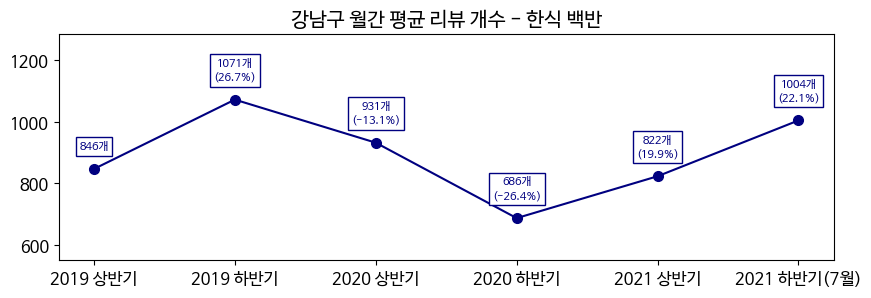

In [115]:
compare_review(강남_백반, 0, "한식 백반")

In [116]:
filtered = lst[(lst['세부 업종'] == "구이류") | (lst['세부 업종'] == "백반류, 구이류")] 
강남_구이 = df[df['가게명'].isin(filtered['가게명'])]

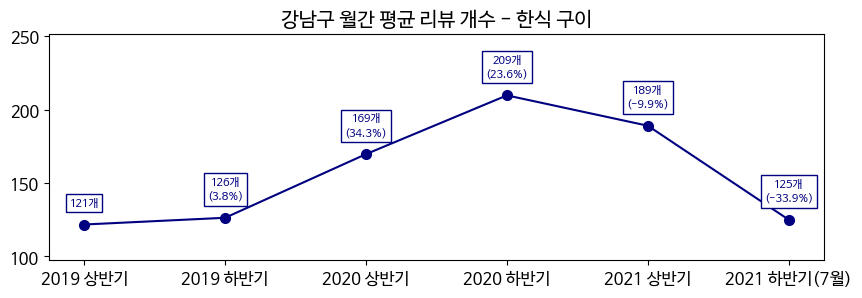

In [117]:
compare_review(강남_구이, 0, "한식 구이")

In [118]:
filtered = lst[(lst['세부 업종'] == "백반류, 국탕류") | (lst['세부 업종'] == "면류, 국탕류")| (lst['세부 업종'] == "국탕류")]
강남_국탕 = df[df['가게명'].isin(filtered['가게명'])]

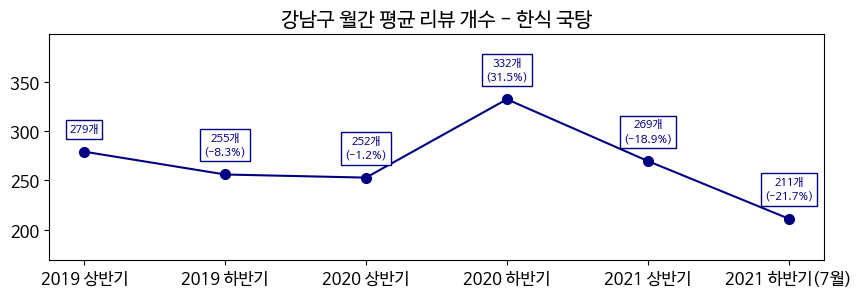

In [119]:
compare_review(강남_국탕, 0, "한식 국탕")

In [120]:
filtered = lst[(lst['세부 업종'] == "면류, 국탕류") | (lst['세부 업종'] == "면류, 백반류")| (lst['세부 업종'] == "면류, 구이류") | (lst['세부 업종'] == "면류")]
강남_면류 = df[df['가게명'].isin(filtered['가게명'])]

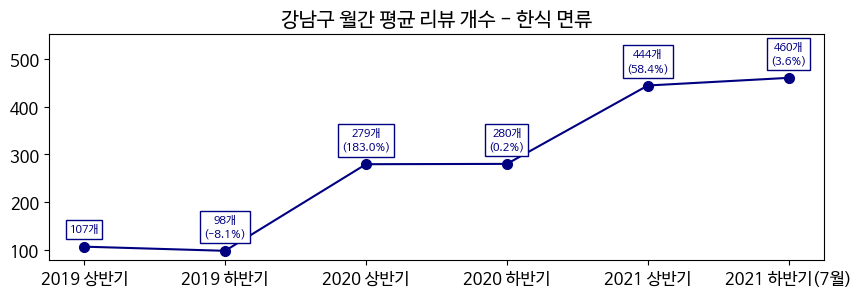

In [121]:
compare_review(강남_면류, 0, "한식 면류")

In [80]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./마포구_리뷰최종/마포구_한식_매출추가_3.csv")
lst = pd.read_csv("./마포구_리뷰최종/마포구_한식_세부업종.csv")

In [81]:
lst['라벨'].unique()

array(['국탕류', '백반류', '삼겹살', '면류', '삼겹살, 면류', '국탕류, 면류'], dtype=object)

In [82]:
filtered = lst[(lst['라벨'] == "백반류")]
마포_백반 = df[df['가게명'].isin(filtered['가게명'])]

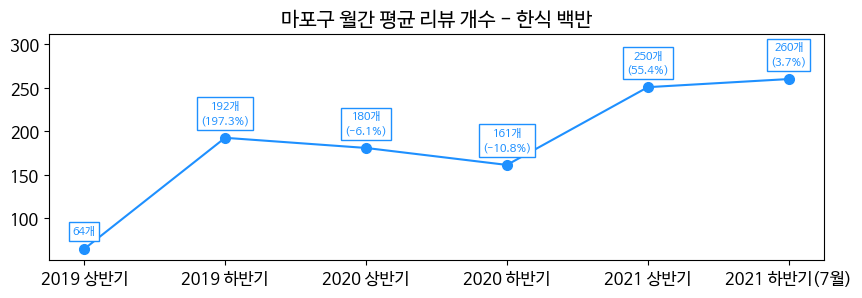

In [83]:
compare_review(마포_백반,1,"한식 백반")

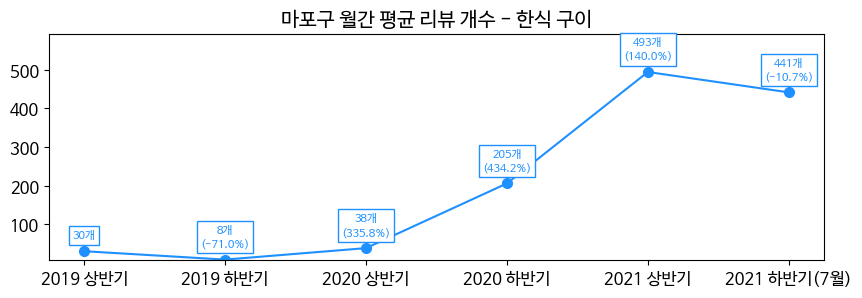

In [84]:
filtered = lst[(lst['라벨'] == "삼겹살")]
마포_구이 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_구이, 1, "한식 구이")

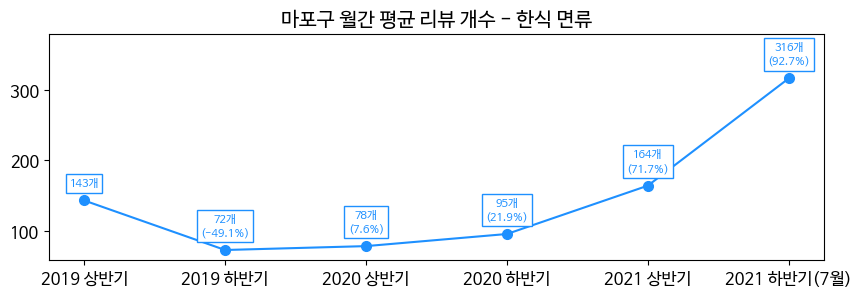

In [18]:
filtered = lst[(lst['라벨'] == "면류")|(lst['라벨'] == "삼겹살, 면류") | (lst['라벨'] == "국탕류, 면류")]
마포_면류 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_면류, 1, "한식 면류")

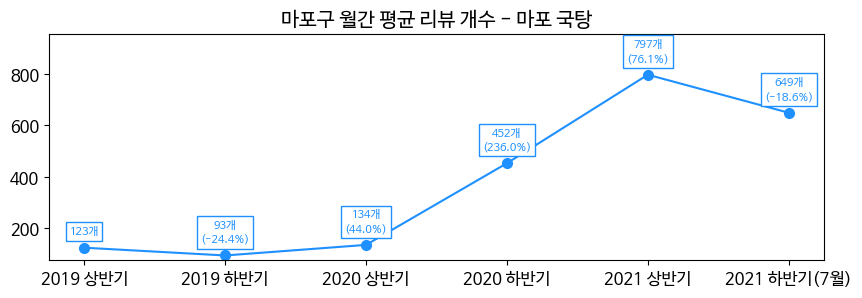

In [85]:
filtered = lst[(lst['라벨'] == "국탕류")|(lst['라벨'] == "국탕류, 면류")]
마포_국탕 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_국탕, 1, "마포 국탕")

# 일식 리뷰 개수 추이 비교

In [20]:
df = pd.read_csv("./강남구/강남구_일식돈까스_매출추가_3.csv")
lst = pd.read_csv("./강남구url/강남구_일식돈까스_세부업종.csv")
lst['세부 업종'].unique()

array(['횟집', '초밥', '덮밥/가정식', '돈까스', '라멘', '카레', '우동', '횟집 ', '종합', '샤브샤브'],
      dtype=object)

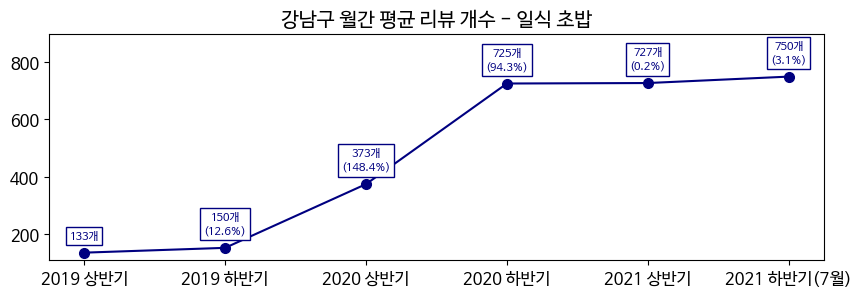

In [22]:
filtered = lst[(lst['세부 업종'] == "초밥")]
강남_초밥 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(강남_초밥, 0, "일식 초밥")

<ipython-input-3-323c3300fa12>:52: RuntimeWarning: invalid value encountered in double_scalars
  plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",
<ipython-input-3-323c3300fa12>:52: RuntimeWarning: divide by zero encountered in double_scalars
  plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",


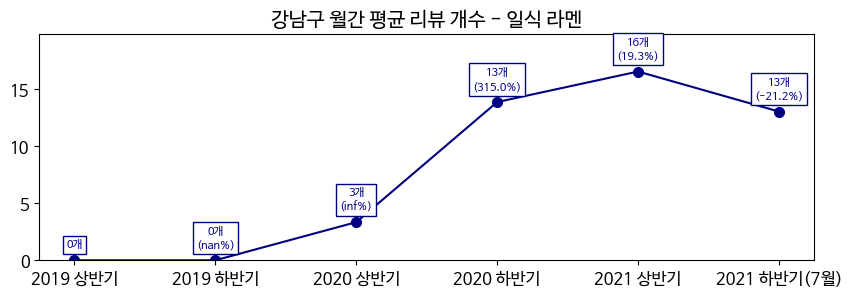

In [23]:
filtered = lst[(lst['세부 업종'] == "라멘")]
강남_라멘 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(강남_라멘, 0, "일식 라멘")

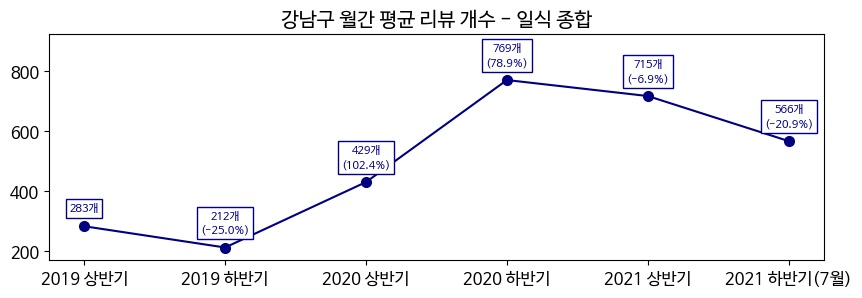

In [24]:
filtered = lst[(lst['세부 업종'] == "덮밥/가정식") | (lst['세부 업종'] == "돈까스") | (lst['세부 업종'] == "카레") | (lst['세부 업종'] == "우동")|(lst['세부 업종'] == "종합")|(lst['세부 업종'] == "샤브샤브")]
강남_종합일식 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(강남_종합일식, 0, "일식 종합")

In [25]:
# 라벨링 된 것만 가져오기 
df = pd.read_csv("./마포구_리뷰최종/마포구_일식돈까스_매출추가_3.csv")
lst = pd.read_csv("./마포구_리뷰최종/마포구_일식돈까스_세부업종.csv")
lst['라벨'].unique()

array(['초밥', '초밥, 종합일식', '횟집', '종합일식', '초밥, 횟집', '종합일식, 횟집', '라멘'],
      dtype=object)

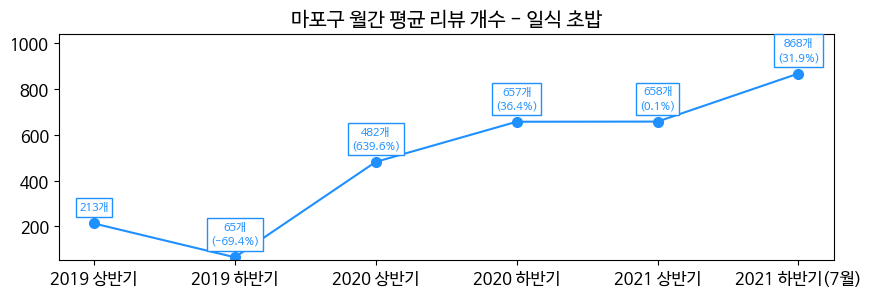

In [27]:
filtered = lst[(lst['라벨'] == "초밥")|(lst['라벨'] == "초밥, 횟집")|(lst['라벨'] == "초밥, 종합일식")]
마포_초밥 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_초밥, 1, "일식 초밥")

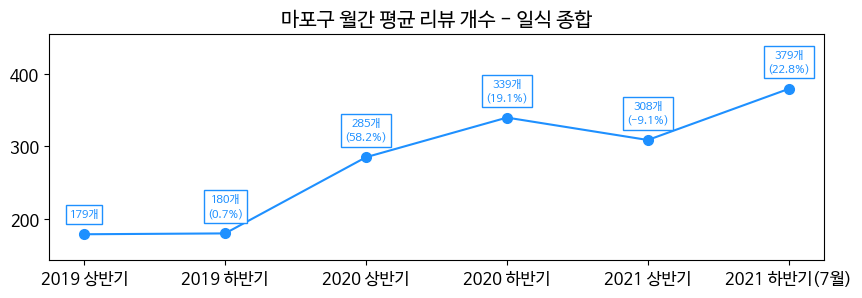

In [29]:
filtered = lst[(lst['라벨'] == "초밥, 종합일식")|(lst['라벨'] == "종합일식")|(lst['라벨'] == "종합일식, 횟집")]
마포_종합일식 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_종합일식, 1, "일식 종합")

<ipython-input-3-323c3300fa12>:87: RuntimeWarning: invalid value encountered in double_scalars
  plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",
<ipython-input-3-323c3300fa12>:87: RuntimeWarning: divide by zero encountered in double_scalars
  plt.text(v, y[i]+(max(y)*1.05-max(y)), str(int(y[i]))+"개\n("+str((round((y[i]/y[i-1]*100-100), 1)))+"%)",


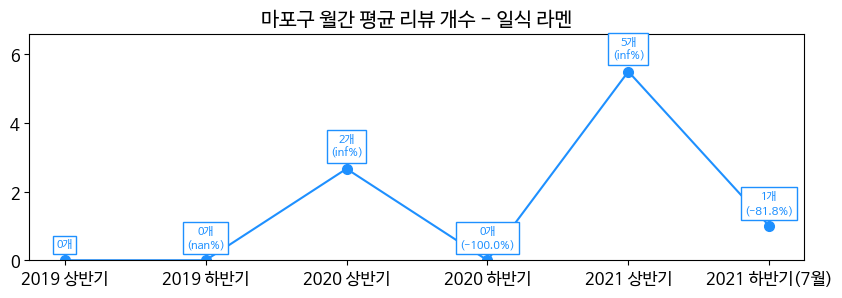

In [28]:
filtered = lst[(lst['라벨'] == "라멘")]
마포_라멘 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(마포_라멘, 1, "일식 라멘")
#충분한 모수가 확보되지 않아 유효하지 않은 시각화 자료(2곳) 

# 양식 리뷰 개수 추이 비교

In [30]:
df = pd.read_csv("./강남구/강남구_피자양식_매출추가_3.csv")
lst = pd.read_csv("./강남구url/강남구_피자양식_세부업종.csv")
lst['세부업종 '].unique()

array(['파스타', '스테이크', nan], dtype=object)

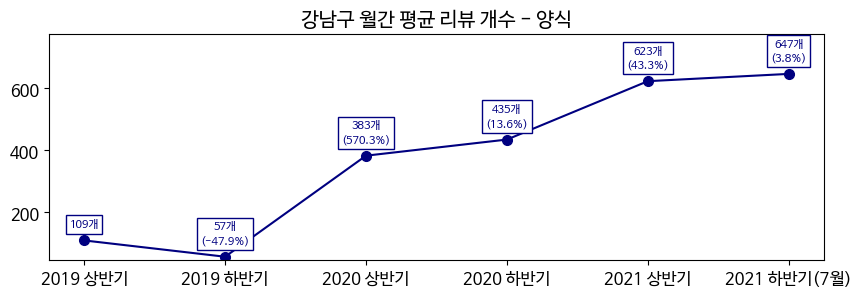

In [31]:
filtered = lst[(lst['세부업종 '] == "파스타")|(lst['세부업종 '] == "스테이크")]
강남_양식 = df[df['가게명'].isin(filtered['가게명'])]
compare_review(강남_양식, 0, "양식")

In [32]:
df = pd.read_csv("./마포구_리뷰최종/마포구_피자양식_매출추가_3.csv")
lst = pd.read_csv("./마포구_리뷰최종/마포구_피자양식_세부업종.csv")

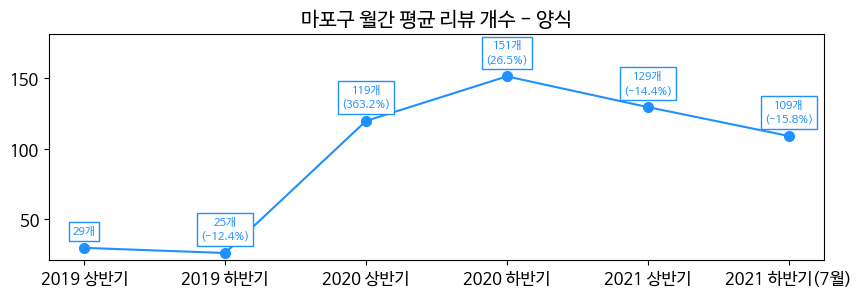

In [33]:
마포_양식 = df[df['가게명'].isin(lst['가게명'])]
compare_review(마포_양식,1,"양식")

# 야식 리뷰 개수 추이 비교

In [34]:
df = pd.read_csv("./강남구/강남구_야식_매출추가_3.csv")
df2 = pd.read_csv("./강남구/강남구_족발보쌈_매출추가_2.csv")
df = pd.concat([df, df2])
lst = pd.read_csv("./강남구url/강남구_야식_세부업종.csv")
lst['세부업종'].unique()

array(['족발보쌈', '곱창', '삼겹살', '술집', '애매', '닭발', '양고기/양꼬치'], dtype=object)

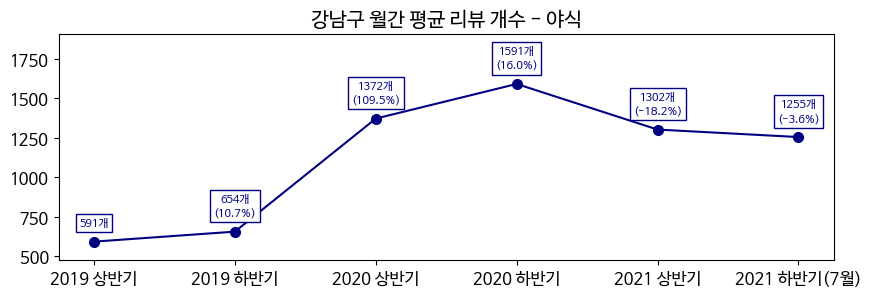

In [35]:
filtered = lst[(lst['세부업종'] == "족발보쌈")|(lst['세부업종'] == "곱창")|(lst['세부업종'] == "삼겹살")|(lst['세부업종'] == "술집")|(lst['세부업종'] == "양고기/양꼬치")|(lst['세부업종'] == "애매")]
강남_야식 = df[df['가게명'].isin(filtered['가게명'])]

compare_review(강남_야식,0,"야식")

In [36]:
df = pd.read_csv("./마포구_리뷰최종/마포구_야식_매출추가_3.csv")
df2 = pd.read_csv("./마포구_리뷰최종/마포구_족발보쌈_매출추가_2.csv")
df = pd.concat([df, df2])
lst = pd.read_csv("./마포구_리뷰최종/마포구_야식_세부업종.csv")

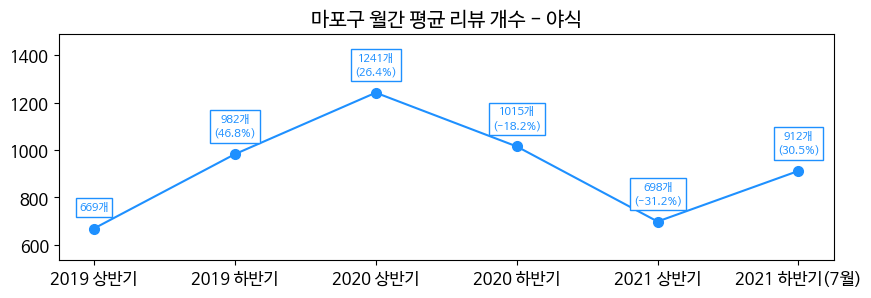

In [37]:
마포_야식 = df[df['가게명'].isin(lst['가게명'])]
compare_review(마포_야식,1,"야식")